#### LGM-VIPAUGUST

#### DATA SCIENCE INTERN

#### NAME: DARSHAN M

#### TASK: EXPLORATORY DATA ANALYSIS ON TERRORISM DATA (Intermediate Level Task)

In [96]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtd/globalterrorismdb_0718dist.csv


In [8]:
import matplotlib.pyplot as plt
import cv2

In [98]:
df=pd.read_csv('../input/gtd/globalterrorismdb_0718dist.csv')

In [99]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [100]:
df.shape

(181691, 135)

In [101]:
df = df[['iyear','imonth','iday','extended','country_txt','region_txt','attacktype1_txt','city','targtype1_txt','nkill','nwound','gname']]
df['casualties'] = df['nkill'] + df['nwound']
df.head()

,iyear,imonth,iday,extended,country_txt,region_txt,attacktype1_txt,city,targtype1_txt,nkill,nwound,gname,casualties
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Assassination,Santo Domingo,Private Citizens & Property,1.0,0.0,MANO-D,1.0
1,1970,0,0,0,Mexico,North America,Hostage Taking (Kidnapping),Mexico city,Government (Diplomatic),0.0,0.0,23rd of September Communist League,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Assassination,Unknown,Journalists & Media,1.0,0.0,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Bombing/Explosion,Athens,Government (Diplomatic),NaN,NaN,Unknown,NaN
4,1970,1,0,0,Japan,East Asia,Facility/Infrastructure Attack,Fukouka,Government (Diplomatic),NaN,NaN,Unknown,NaN


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   extended         181691 non-null  int64  
 4   country_txt      181691 non-null  object 
 5   region_txt       181691 non-null  object 
 6   attacktype1_txt  181691 non-null  object 
 7   city             181257 non-null  object 
 8   targtype1_txt    181691 non-null  object 
 9   nkill            171378 non-null  float64
 10  nwound           165380 non-null  float64
 11  gname            181691 non-null  object 
 12  casualties       164817 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 18.0+ MB


In [103]:
df.shape

(181691, 13)

#### Note:-

Our dataset is having 1,81,691 rows and 13 columns

Let's check for **missing values** in our dataset

In [104]:
df.isnull().sum()

iyear                  0
imonth                 0
iday                   0
extended               0
country_txt            0
region_txt             0
attacktype1_txt        0
city                 434
targtype1_txt          0
nkill              10313
nwound             16311
gname                  0
casualties         16874
dtype: int64

In [105]:
df=df.dropna(axis=0)

In [106]:
df.isnull().sum()

iyear              0
imonth             0
iday               0
extended           0
country_txt        0
region_txt         0
attacktype1_txt    0
city               0
targtype1_txt      0
nkill              0
nwound             0
gname              0
casualties         0
dtype: int64

#### Note:-

Our data is now cleaned and it does not possess any missing values

**Exploaratory Data Analysis**:-

Exploratory data analysis is an important step in any research analysis. It searches for **patterns and relationships** in the data. In other words, we may explain EDA as a process to **summarise the crucial characteristics of the data** to get better insights.

**Data analysis is divided into the following parts:**


### 1. Descriptive Statistics:

Descriptive statistics summarize a given data set. It includes measures of central tendency, measures of variation and distribution of the data.
<br> The **measures of central tendency** include the mean, median, and mode, while **measures of variability** include the standard deviation, variance, the coefficient of variation, and so on.

### 2. Inferential Statistics:
Inferential statistics are procedures that help in making inferences about a population based on findings from a sample.<br>
It includes **testing of hypothesis** and **parameter estimation**. It allows us to infer parameters of the population based on sample and build models on it.


#### Let's have a look at the statistical five point summary

In [123]:
df.describe()

,iyear,imonth,iday,extended,nkill,nwound,casualties
count,164384.000000,164384.000000,164384.000000,164384.000000,164384.000000,164384.000000,164384.000000
mean,2003.174348,6.481999,15.516644,0.033069,2.133419,3.168788,5.302207
std,12.789087,3.388046,8.807003,0.178817,9.821208,36.048736,42.123147
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,0.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,1.000000,1384.000000,8191.000000,9574.000000


In [9]:
img=cv2.imread(r'C:\Users\Darshan\Desktop\LGM-VIPAUGUST INTERNSHIP\edda.jpeg')

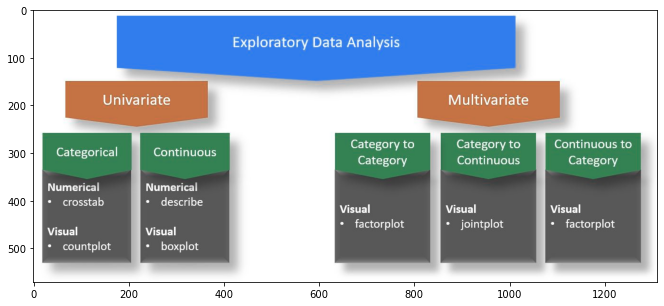

In [10]:
plt.figure(figsize=(20,5))
plt.imshow(img)
plt.show()

In [108]:
df.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt',
       'attacktype1_txt', 'city', 'targtype1_txt', 'nkill', 'nwound', 'gname',
       'casualties'],
      dtype='object')

In [109]:
df.dtypes

iyear                int64
imonth               int64
iday                 int64
extended             int64
country_txt         object
region_txt          object
attacktype1_txt     object
city                object
targtype1_txt       object
nkill              float64
nwound             float64
gname               object
casualties         float64
dtype: object

Let's separate the **numerical** and **categorical** columns from our data

In [110]:
df_num=df.select_dtypes(include=np.number)
df_cat=df.select_dtypes(include='object')

In [111]:
df_num.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'nkill', 'nwound', 'casualties'], dtype='object')

In [112]:
df_cat.columns

Index(['country_txt', 'region_txt', 'attacktype1_txt', 'city', 'targtype1_txt',
       'gname'],
      dtype='object')

Let's keep the features which is required for our further analysis from the original data

In [113]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

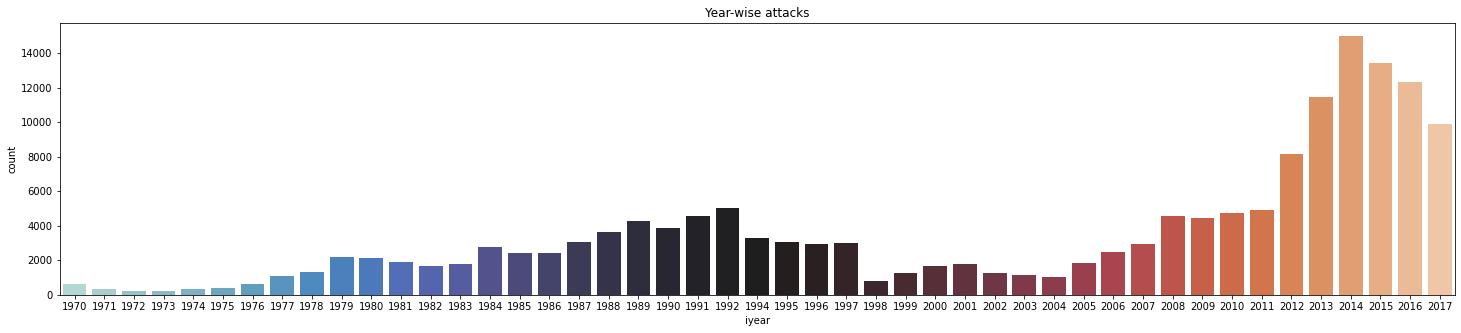

In [114]:
plt.figure(figsize=(25,5))
sns.countplot(df['iyear'],palette='icefire')
plt.title('Year-wise attacks')
plt.show()

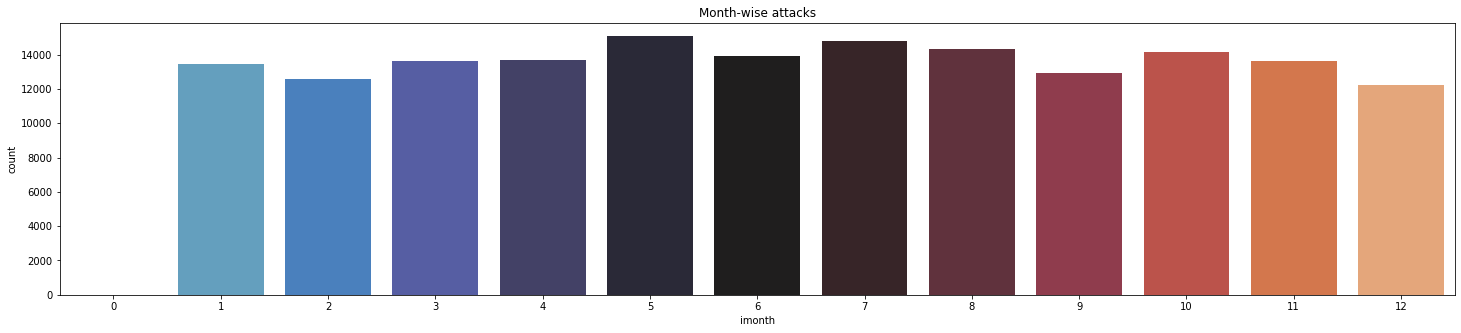

In [115]:
plt.figure(figsize=(25,5))
sns.countplot(df['imonth'],palette='icefire')
plt.title('Month-wise attacks')
plt.show()

Text(0.5, 1.0, 'Type of Attack')

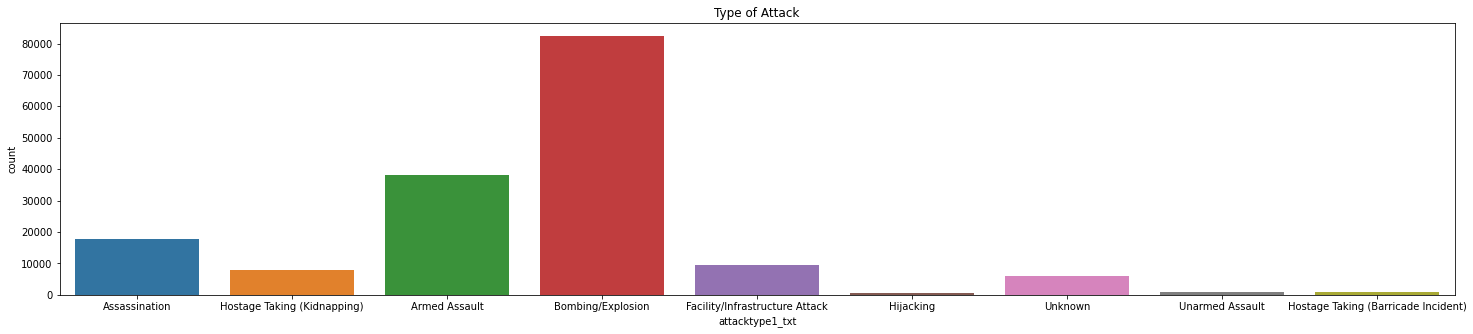

In [116]:
plt.figure(figsize=(25,5))
sns.countplot(df['attacktype1_txt'])
plt.title('Type of Attack')

#### Lets see how our numerical features are distributed better through a box-plot

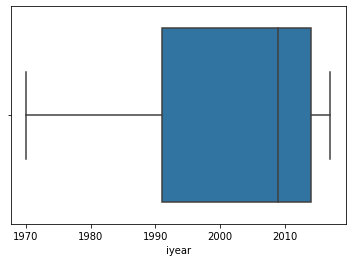

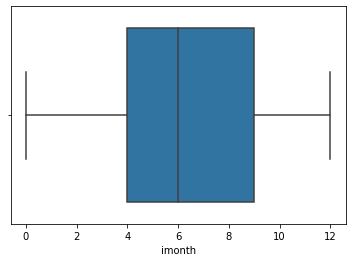

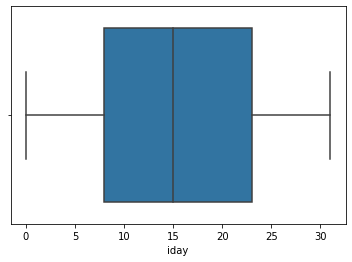

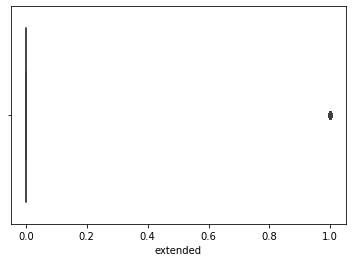

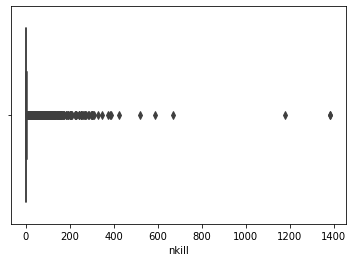

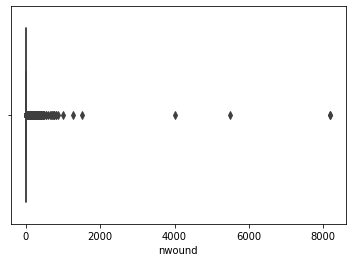

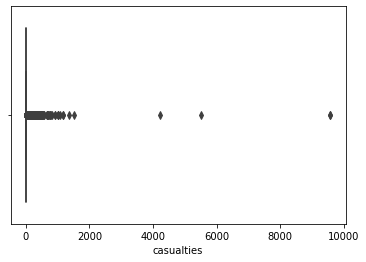

In [117]:
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.show()

In [118]:
df_cat.columns

Index(['country_txt', 'region_txt', 'attacktype1_txt', 'city', 'targtype1_txt',
       'gname'],
      dtype='object')

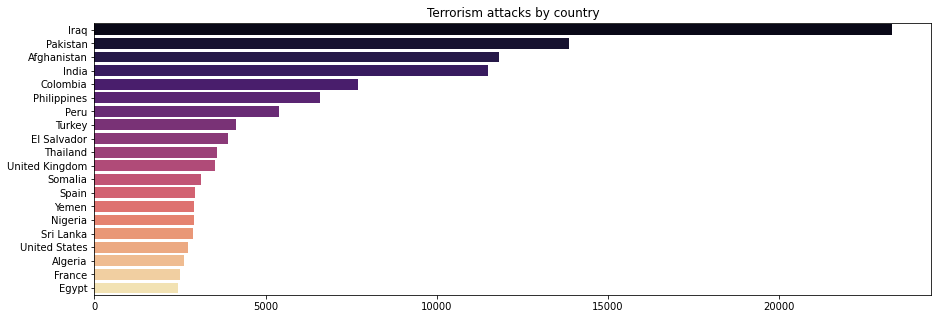

In [119]:
plt.figure(figsize=(15,5))
sns.barplot(x = df['country_txt'].value_counts()[:20].values, y = df['country_txt'].value_counts()[:20].index, 
            palette = 'magma')
plt.title('Terrorism attacks by country')
plt.show()

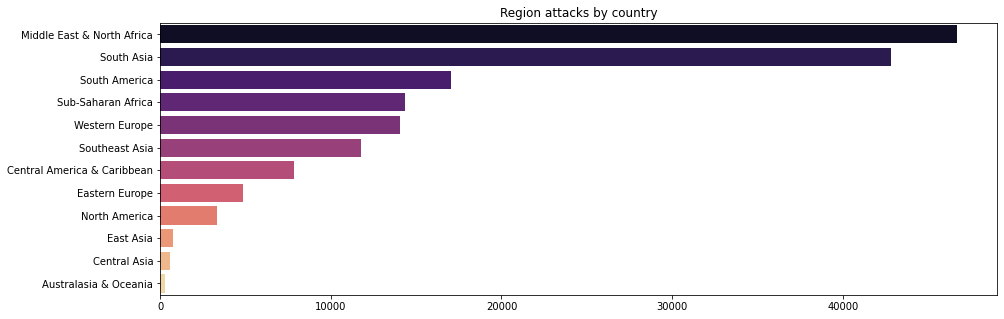

In [120]:
plt.figure(figsize=(15,5))
sns.barplot(x = df['region_txt'].value_counts()[:20].values, y = df['region_txt'].value_counts()[:20].index, 
            palette = 'magma')
plt.title('Region attacks by country')
plt.show()

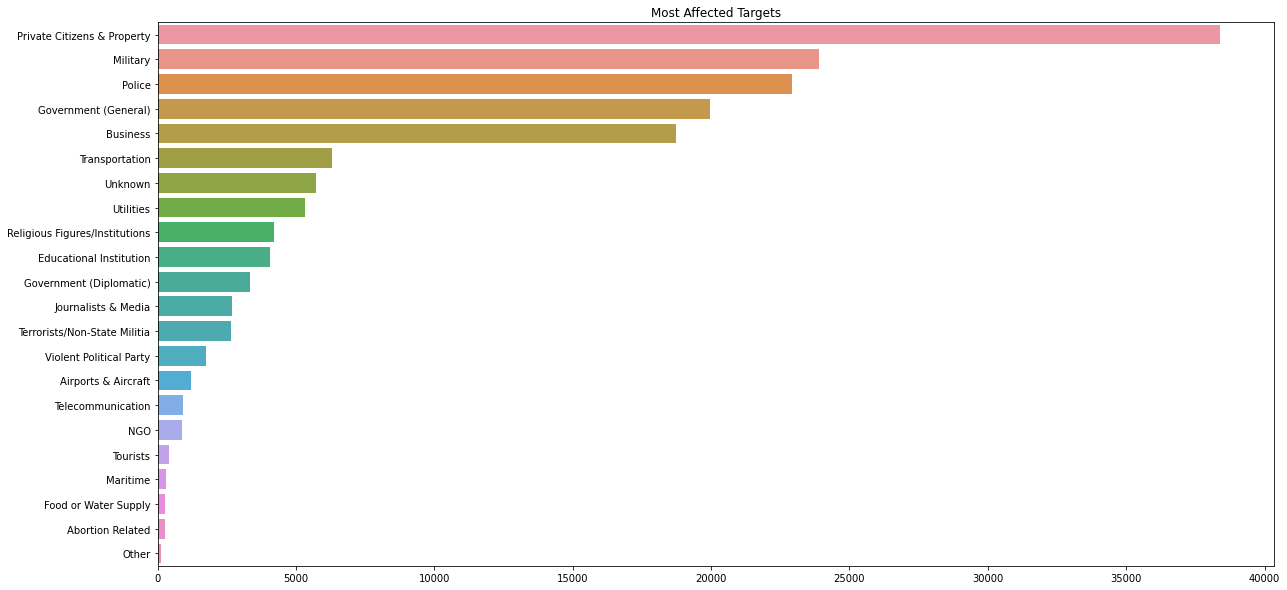

In [121]:
plt.figure(figsize=(20,10))
sns.barplot(y=df['targtype1_txt'].value_counts().index,x=df['targtype1_txt'].value_counts().values)
plt.title('Most Affected Targets')
plt.show()

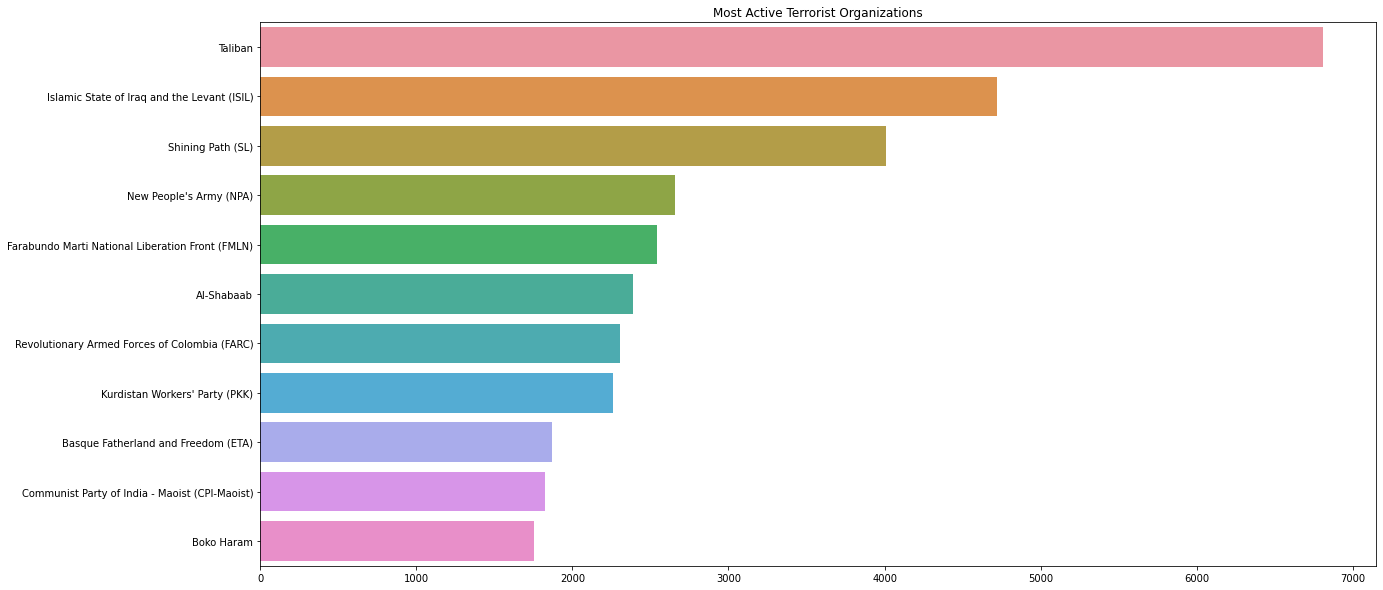

In [122]:
plt.figure(figsize=(20,10))
sns.barplot(y=df['gname'].value_counts()[1:12].index,x=df['gname'].value_counts()[1:12].values)
plt.title('Most Active Terrorist Organizations')
plt.show()

# Thank You